# Women Income scatter plot

In [1]:
import pandas as pd
import glob 
import re
import numpy as np
import matplotlib.pyplot as plt

# Gathering seperate csv files reading and concatinating

In [2]:
all_files = glob.glob('states*.csv')

In [3]:
df = [pd.read_csv(f) for f in all_files]

In [4]:
df1=pd.concat(df)

# removing unwanted columns and dropping duplicates

In [5]:
df1.drop('Unnamed: 0', inplace=True, axis=1)

In [6]:
df1.set_index('State',inplace=True)

In [7]:
df1.drop_duplicates(inplace=True)

# splitting gender pop into men and women and then concatenate into dataframe

In [8]:
f=df1['GenderPop'].str.split(pat='_', n=1, expand=True)

In [9]:
f.rename(columns={0: "Men", 1: "Women"},inplace=True)

In [10]:
df1=pd.concat([df1,f],axis=1)

# drop gender pop remove special cahracters from data using regex and replace

In [11]:
df1.drop('GenderPop',inplace = True,axis=1)

In [12]:
df1.replace(['M','F','%'],'',regex=True, inplace= True)

In [13]:
df1['Income']=df1['Income'].apply(lambda x: re.sub(r'[$]','', str(x)))

In [14]:
df1.replace(r'', np.nan, regex=True,inplace= True)

# Convert data into float

In [15]:
df1=df1.astype('float64',copy=False, errors='raise')

In [16]:
df1

,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Men,Women
State,,,,,,,,,,
Alabama,4830620.0,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,2341093.0,2489527.0
Alaska,733375.0,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,384160.0,349215.0
Arizona,6641928.0,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,54207.820955,3299088.0,3342840.0
Arkansas,2958208.0,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,41935.633968,1451913.0,1506295.0
California,38421464.0,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,67264.782303,19087135.0,19334329.0
Colorado,5278906.0,20.784380,69.895572,3.546377,0.573833,2.661997,NaN,64657.801787,2648667.0,2630239.0
Connecticut,3593222.0,15.604831,67.677053,10.348068,0.126208,4.021981,0.018599,76146.560588,1751607.0,1841615.0
Delaware,926454.0,8.824766,64.632710,20.743925,0.259813,3.268692,NaN,61827.976636,448413.0,478041.0
District of Columbia,647484.0,9.165922,33.103911,51.776536,0.200559,3.383240,0.029609,75466.363636,306674.0,340810.0


In [17]:
df1.dtypes

TotalPop    float64
Hispanic    float64
White       float64
Black       float64
Native      float64
Asian       float64
Pacific     float64
Income      float64
Men         float64
Women       float64
dtype: object

# fill missing values

In [18]:
df1['Women'].fillna(df1['TotalPop']-df1['Men'],inplace=True)

# scatter plots

<AxesSubplot:xlabel='Income', ylabel='Women'>

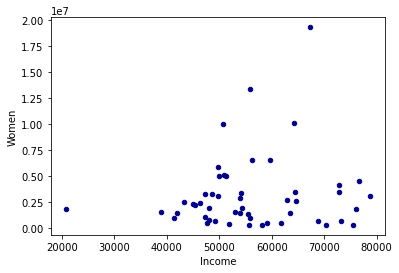

In [19]:
 df1.plot.scatter(x='Income',y='Women',c='DarkBlue')

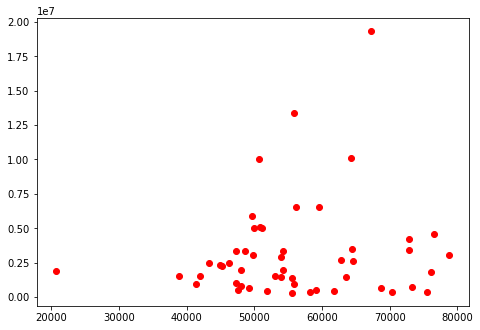

In [20]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df1['Income'], df1['Women'], color='r')
plt.show()

# question 2

In [21]:
inventory=pd.read_csv('inventory.csv',index_col='location')

In [22]:
staten_island=inventory.head(10)
display(staten_island)

,product_type,product_description,quantity,price
location,,,,
Staten Island,seeds,daisy,4,6.99
Staten Island,seeds,calla lily,46,19.99
Staten Island,seeds,tomato,85,13.99
Staten Island,garden tools,rake,4,13.99
Staten Island,garden tools,wheelbarrow,0,89.99
Staten Island,garden tools,spade,93,19.99
Staten Island,pest_control,insect killer,74,12.99
Staten Island,pest_control,weed killer,8,23.99
Staten Island,planter,20 inch terracotta planter,0,17.99


In [23]:
product_request=staten_island.loc[:,'product_description']
display(product_request)

location
Staten Island                         daisy
Staten Island                    calla lily
Staten Island                        tomato
Staten Island                          rake
Staten Island                   wheelbarrow
Staten Island                         spade
Staten Island                 insect killer
Staten Island                   weed killer
Staten Island    20 inch terracotta planter
Staten Island        8 inch plastic planter
Name: product_description, dtype: object

In [24]:
seed_request=inventory[(inventory.index=='Brooklyn')]

In [25]:
seed_request.set_index('product_type',append=True,inplace=True)

In [26]:
seed_request=seed_request.loc['Brooklyn','seeds']
display(seed_request)

<ipython-input-26-dba37b52e8ef>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  seed_request=seed_request.loc['Brooklyn','seeds']


product_description  quantity  price
location product_type                                     
Brooklyn seeds                      daisy        50   6.99
         seeds                 calla lily         0  19.99
         seeds                     tomato         0  13.99

# Inventory with Instock

In [27]:
instock=inventory.loc[:,'quantity']!=0
instock.name='Instock'
inventory=pd.concat([inventory,instock],axis=1)
display(inventory)

,product_type,product_description,quantity,price,Instock
location,,,,,
Staten Island,seeds,daisy,4,6.99,True
Staten Island,seeds,calla lily,46,19.99,True
Staten Island,seeds,tomato,85,13.99,True
Staten Island,garden tools,rake,4,13.99,True
Staten Island,garden tools,wheelbarrow,0,89.99,False
Staten Island,garden tools,spade,93,19.99,True
Staten Island,pest_control,insect killer,74,12.99,True
Staten Island,pest_control,weed killer,8,23.99,True
Staten Island,planter,20 inch terracotta planter,0,17.99,False


In [29]:
total=inventory.loc[:,'quantity']*inventory.loc[:,'price']
total.name='Total_value'
inventory=pd.concat([inventory,total],axis=1)


# Inventory with total value

In [30]:
display(inventory)

,product_type,product_description,quantity,price,Instock,Total_value
location,,,,,,
Staten Island,seeds,daisy,4,6.99,True,27.96
Staten Island,seeds,calla lily,46,19.99,True,919.54
Staten Island,seeds,tomato,85,13.99,True,1189.15
Staten Island,garden tools,rake,4,13.99,True,55.96
Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00
Staten Island,garden tools,spade,93,19.99,True,1859.07
Staten Island,pest_control,insect killer,74,12.99,True,961.26
Staten Island,pest_control,weed killer,8,23.99,True,191.92
Staten Island,planter,20 inch terracotta planter,0,17.99,False,0.00
